In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv('Unemployment.csv')

In [3]:
dataset

,Region,Date,Frequency,Unemployment_Rate,Estimated_Employed,Estimated_LabourParticipationRate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762,44.68,Rural
...,...,...,...,...,...,...,...
735,West Bengal,29-02-2020,Monthly,7.55,10871168,44.09,Urban
736,West Bengal,31-03-2020,Monthly,6.67,10806105,43.34,Urban
737,West Bengal,30-04-2020,Monthly,15.63,9299466,41.20,Urban
738,West Bengal,31-05-2020,Monthly,15.22,9240903,40.67,Urban


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Region                             740 non-null    object 
 1   Date                               740 non-null    object 
 2    Frequency                         740 non-null    object 
 3   Unemployment_Rate                  740 non-null    float64
 4   Estimated_Employed                 740 non-null    int64  
 5   Estimated_LabourParticipationRate  740 non-null    float64
 6   Area                               740 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 40.6+ KB


In [5]:
dataset.drop(' Frequency',axis=1,inplace=True)

In [6]:
dataset.drop('Date',axis=1,inplace=True)

In [7]:
dataset.Estimated_LabourParticipationRate=dataset.Estimated_LabourParticipationRate.astype(int)

In [8]:
dataset.Unemployment_Rate=dataset.Unemployment_Rate.astype(int)

In [9]:
dataset

,Region,Unemployment_Rate,Estimated_Employed,Estimated_LabourParticipationRate,Area
0,Andhra Pradesh,3,11999139,43,Rural
1,Andhra Pradesh,3,11755881,42,Rural
2,Andhra Pradesh,3,12086707,43,Rural
3,Andhra Pradesh,3,12285693,43,Rural
4,Andhra Pradesh,5,12256762,44,Rural
...,...,...,...,...,...
735,West Bengal,7,10871168,44,Urban
736,West Bengal,6,10806105,43,Urban
737,West Bengal,15,9299466,41,Urban
738,West Bengal,15,9240903,40,Urban


In [10]:
dataset.corr()

,Unemployment_Rate,Estimated_Employed,Estimated_LabourParticipationRate
Unemployment_Rate,1.000000,-0.223024,0.003409
Estimated_Employed,-0.223024,1.000000,0.010746
Estimated_LabourParticipationRate,0.003409,0.010746,1.000000


In [11]:
dataset.columns

Index(['Region', 'Unemployment_Rate', 'Estimated_Employed',
       'Estimated_LabourParticipationRate', 'Area'],
      dtype='object')

In [12]:
Y=dataset['Unemployment_Rate']

In [13]:
X=dataset[['Region','Estimated_Employed', 'Estimated_LabourParticipationRate','Area']]

In [14]:
X

,Region,Estimated_Employed,Estimated_LabourParticipationRate,Area
0,Andhra Pradesh,11999139,43,Rural
1,Andhra Pradesh,11755881,42,Rural
2,Andhra Pradesh,12086707,43,Rural
3,Andhra Pradesh,12285693,43,Rural
4,Andhra Pradesh,12256762,44,Rural
...,...,...,...,...
735,West Bengal,10871168,44,Urban
736,West Bengal,10806105,43,Urban
737,West Bengal,9299466,41,Urban
738,West Bengal,9240903,40,Urban


In [15]:
NewArea=X['Area']
NewArea=pd.get_dummies(X.Area)
#Region=X['Region']
#Region=pd.get_dummies(Region,drop_first=True)
X=pd.concat([X,NewArea],axis=1)

In [16]:
X=pd.get_dummies(X, columns=['Area'], drop_first=True)

In [17]:
X

,Region,Estimated_Employed,Estimated_LabourParticipationRate,Rural,Urban,Area_Urban
0,Andhra Pradesh,11999139,43,1,0,0
1,Andhra Pradesh,11755881,42,1,0,0
2,Andhra Pradesh,12086707,43,1,0,0
3,Andhra Pradesh,12285693,43,1,0,0
4,Andhra Pradesh,12256762,44,1,0,0
...,...,...,...,...,...,...
735,West Bengal,10871168,44,0,1,1
736,West Bengal,10806105,43,0,1,1
737,West Bengal,9299466,41,0,1,1
738,West Bengal,9240903,40,0,1,1


In [18]:
NewRegion=X['Region']
NewRegion=pd.get_dummies(X.Region)
#Region=X['Region']
#Region=pd.get_dummies(Region,drop_first=True)
X=pd.concat([X,NewRegion],axis=1)

In [19]:
X=pd.get_dummies(X, columns=['Region'], drop_first=True)

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Estimated_Employed                 740 non-null    int64
 1   Estimated_LabourParticipationRate  740 non-null    int32
 2   Rural                              740 non-null    uint8
 3   Urban                              740 non-null    uint8
 4   Area_Urban                         740 non-null    uint8
 5   Andhra Pradesh                     740 non-null    uint8
 6   Assam                              740 non-null    uint8
 7   Bihar                              740 non-null    uint8
 8   Chandigarh                         740 non-null    uint8
 9   Chhattisgarh                       740 non-null    uint8
 10  Delhi                              740 non-null    uint8
 11  Goa                                740 non-null    uint8
 12  Gujarat               

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

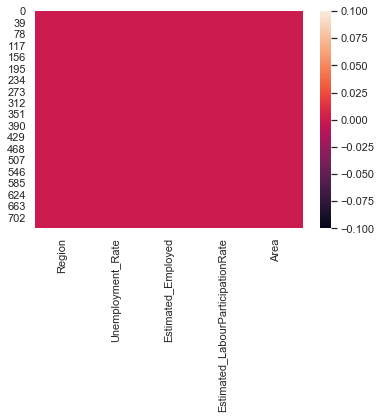

In [22]:
sns.heatmap(dataset.isnull())

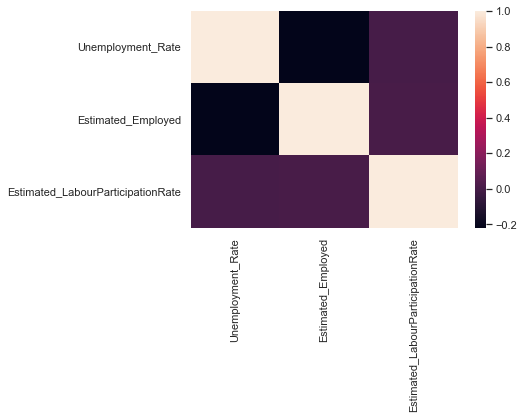

In [23]:
sns.heatmap(dataset.corr())

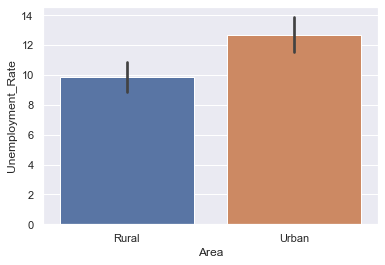

In [24]:
sns.barplot(data=dataset ,y='Unemployment_Rate', x='Area')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
fit_RF=RandomForestRegressor(n_estimators=200).fit(X_train,y_train)

In [29]:
pred_train=fit_RF.predict(X_train)
pred_test=fit_RF.predict(X_test)

In [30]:
RMSE_train=np.sqrt(mean_squared_error(y_train,pred_train))
RMSE_test=np.sqrt(mean_squared_error(y_train,pred_train))

In [31]:
print("Root mean square=" +str(RMSE_train))
print(RMSE_test)

Root mean square=2.502523215094106
2.502523215094106


In [32]:
r2_score(y_train,pred_train)

0.9439522227052193

In [33]:
r2_score(y_test,pred_test)

0.7051611537237532

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
fit_GB=GradientBoostingRegressor().fit(X_train,y_train)

In [36]:
pred_train_GB=fit_GB.predict(X_train)
pred_test_GB=fit_GB.predict(X_test)

In [37]:
RMSE_train_GB=np.sqrt(mean_squared_error(y_train,pred_train))
RMSE_test_GB=np.sqrt(mean_squared_error(y_train,pred_train))

In [38]:
print("Root mean square of training data=" +str(RMSE_train_GB))
print("Root mean square of training data="+str(RMSE_test_GB))

Root mean square of training data=2.502523215094106
Root mean square of training data=2.502523215094106


In [39]:
r2_score(y_test,pred_test_GB)

0.6596521579920647

In [40]:
r2_score(y_train,pred_train_GB)

0.7745024484481238